In [20]:
from qiskit import *
from qiskit.tools.visualization import plot_bloch_multivector

[ 0.70710678+0.00000000e+00j -0.70710678-8.65956056e-17j]


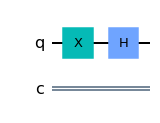

In [21]:
# Create circuit with one qubit and one classical bit

circuit = QuantumCircuit(1,1)

# Add a NOT gate followed by a Hadamard gate to the qubit
circuit.x(0)
circuit.h(0)
#circuit.x(0)

# Simulate the quantum circuit to get the resulting state vector of the system
simulator = Aer.get_backend('statevector_simulator')
result = execute(circuit, backend = simulator).result()
statevector = result.get_statevector()

print(statevector)

%matplotlib inline
circuit.draw(output = 'mpl')

### Note how the statevector of the system is a superposition of the 0 and 1 states due to the application of the Hadamard transform.

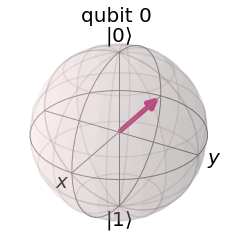

In [22]:
# Plot the statevector of the system after the execution of the circuit on the Bloch sphere.
#
# Note that any qubit state may be represented as a point on the surface of this sphere (for pure states)
# or as a point within the sphere (for mixed states). This is because the relative phase of the state has
# no physical significance, and hence each state is described fully by 3 values, i.e., in 3D.

plot_bloch_multivector(statevector)

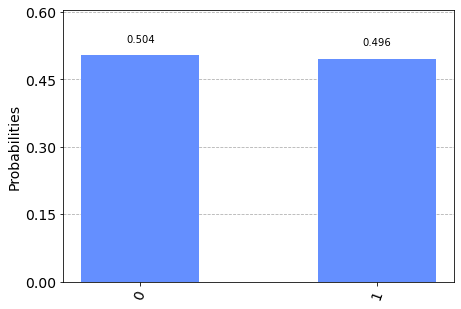

In [23]:
# Add a measurement to the circuit which measures the state of the qubit and stores it in the classical bit.

circuit.measure([0], [0])

# Execute the circuit with shots=1024 repetitions (the default) and get the results of this experiment.
backend = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = backend, shots = 1024).result()
counts = result.get_counts()

# Plot the outputs of the circuit on a histogram
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

### The results of the execution of the circuit are roughly 50-50% for both possible states. This is because the Hadamard gate transforms the |1> state, which was the result of the NOT gate applied on the inital |0> gate, into the |-> state, which is a balanced superposition of the |0> and |1> states.

[[ 0.70710678+0.00000000e+00j  0.70710678+8.65956056e-17j]
 [-0.70710678-8.65956056e-17j  0.70710678+1.73191211e-16j]]


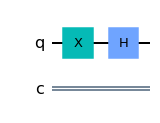

In [24]:
# Get the matrix representation of the quantum circuit we have built

# Create circuit with one qubit and one classical bit

circuit = QuantumCircuit(1,1)

# Add a NOT gate followed by a Hadamard gate to the qubit
circuit.x(0)
circuit.h(0)

# Simulate the quantum circuit to get the resulting state vector of the system
simulator = Aer.get_backend('unitary_simulator')
result = execute(circuit, backend = simulator).result()
unitary = result.get_unitary()

print(unitary)

%matplotlib inline
circuit.draw(output = 'mpl')